<a href="https://colab.research.google.com/github/moushumipriya/moushumipriya/blob/main/Digit_recignition_using_ml_and_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd

import tensorflow as tf


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
y[3601]

'8'

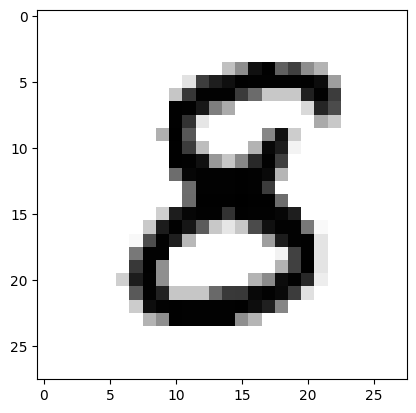

In [ ]:
some_digit = x.to_numpy()[3601]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.show()


In [ ]:
x_train, x_test = x[0:60000], x[60000:70000:]



In [ ]:
y_train, y_test = y[0:60000], y[60000:70000:]

In [ ]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
shuffle_index = np.random.permutation(60000)

In [ ]:
x_train, y_train= x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [ ]:
# Creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)


In [ ]:
y_train

33508    1
14960    6
19206    6
55808    2
25102    6
        ..
52310    5
14336    9
3218     4
57937    4
42783    0
Name: class, Length: 60000, dtype: int8

In [ ]:
# Data normalized with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(x_train, y_train_2)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [ ]:
a = cross_val_score (clf, x_train, y_train_2, cv=3, scoring="accuracy")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
a.mean()

0.9783166666666667

In [ ]:
a.max()

0.9794

In [ ]:
#cnn model

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]


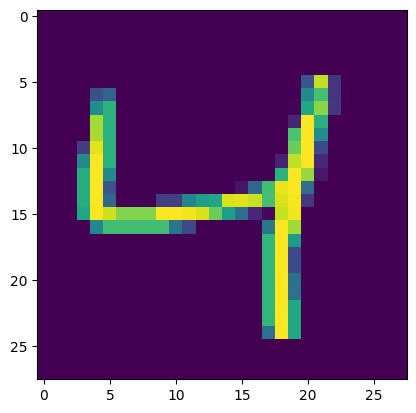

In [ ]:

#represnt the data
np.set_printoptions(linewidth=200)
plt.imshow(x_train[2])
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_train)

In [ ]:
#normalized
x_train , x_test = x_train / 255.0 , x_test / 255.0

In [ ]:
#neural network

In [ ]:
 model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(512, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
 ])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch ,logs={}):
    if (logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling trinning!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
tf= tensorflow

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2012 - accuracy: 0.9407
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0818 - accuracy: 0.9752
Epoch 3/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0534 - accuracy: 0.9831
Epoch 4/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0371 - accuracy: 0.9877
Epoch 5/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9911
Reached 99% accuracy so cancelling trinning!
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0269 - accuracy: 0.9911


In [ ]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0159 - accuracy: 0.9954


[0.01593327336013317, 0.9954166412353516]